# Machine Learning

## `Note`: This model is not well trained.This model is just for practicing purpose.

## Model that Predicts the Fare on the base of Age and Class of Passangers.

In [162]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


In [163]:
# Display the maximumn number of rows in the DataFrame
pd.set_option('display.max_rows', None)
# Display the maximum number of columns in the DataFrame
pd.set_option('display.max_columns', None)
# Loading the Dataset
df = sns.load_dataset("titanic")
# Displaying the first few rows of the dataset
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [164]:
# Let's check for missing values in the dataset
print("\nMissing values in each column:")
print(df.isnull().sum().sort_values(ascending=False))



Missing values in each column:
deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64


In [165]:
# Let's check the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage.sort_values(ascending=False))


Percentage of missing values in each column:
deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
sex             0.000000
pclass          0.000000
survived        0.000000
fare            0.000000
parch           0.000000
sibsp           0.000000
class           0.000000
adult_male      0.000000
who             0.000000
alive           0.000000
alone           0.000000
dtype: float64


In [166]:
# Fill missing values in 'age' with the mean age
if df['age'].isnull().any():
    df['age'] = df['age'].fillna(df['age'].mean())

# Fill missing values in 'embarked' with the mode
if df['embarked'].isnull().any():
    df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop the 'deck' column if it exists
if 'deck' in df.columns:
    df = df.drop(columns=['deck'])

In [167]:
# Let's again check the missing values in the dataset
# Let's check the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage.sort_values(ascending=False))


Percentage of missing values in each column:
embark_town    0.224467
survived       0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
pclass         0.000000
parch          0.000000
fare           0.000000
class          0.000000
embarked       0.000000
who            0.000000
adult_male     0.000000
alive          0.000000
alone          0.000000
dtype: float64


In [168]:
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True  


In [176]:
# Let's Encode the categorical variables using sklearn's LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
label_encoder = LabelEncoder()
# Encode the sex, embarked, parch and sibsp columns
df['sex'] = label_encoder.fit_transform(df['sex'])
df['embarked'] = label_encoder.fit_transform(df['embarked'])
df['parch'] = label_encoder.fit_transform(df['parch'])
df['sibsp'] = label_encoder.fit_transform(df['sibsp'])
df["survived"] = label_encoder.fit_transform(df["survived"])
df["who"] = label_encoder.fit_transform(df["who"])
# Display the first few rows of the dataset after encoding
print("\nDataset after encoding categorical variables:")
print(df.head())



Dataset after encoding categorical variables:
   survived  pclass  sex       age  sibsp  parch      fare  embarked  class  \
0         0       3    1 -0.592481      1      0 -0.502445         2  Third   
1         1       1    0  0.638789      1      0  0.786845         0  First   
2         1       3    0 -0.284663      0      0 -0.488854         2  Third   
3         1       1    0  0.407926      1      0  0.420730         2  First   
4         0       3    1  0.407926      0      0 -0.486337         2  Third   

   who  adult_male  embark_town alive  alone  
0    1        True  Southampton    no  False  
1    2       False    Cherbourg   yes  False  
2    2       False  Southampton   yes   True  
3    2       False  Southampton   yes  False  
4    1        True  Southampton    no   True  


In [170]:
# Let's Scaling the numerical features using StandaradScaler.
scaler = StandardScaler()
# Select numerical columns to scale
numerical_cols = ['age', 'fare']
# Scale the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
# Display the first few rows of the dataset after scaling
print("\nDataset after scaling numerical features:")
print(df.head())


Dataset after scaling numerical features:
   survived  pclass  sex       age  sibsp  parch      fare  embarked  class  \
0         0       3    1 -0.592481      1      0 -0.502445         2  Third   
1         1       1    0  0.638789      1      0  0.786845         0  First   
2         1       3    0 -0.284663      0      0 -0.488854         2  Third   
3         1       1    0  0.407926      1      0  0.420730         2  First   
4         0       3    1  0.407926      0      0 -0.486337         2  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True  


In [160]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


First few predictions:
[ 0.16566118 -0.05116243 -0.67542841  0.02015585 -0.38838154]

Model Evaluation Metrics:
Mean Squared Error: 0.37477641972039377
R-squared Score: 0.4025912503202608

First few actual vs predicted values:
       Actual  Predicted
709 -0.341452   0.165661
439 -0.437007  -0.051162
840 -0.488854  -0.675428
720  0.016023   0.020156
39  -0.422074  -0.388382

Predicted fare for a 50 years old female passenger: [-2.06165882]


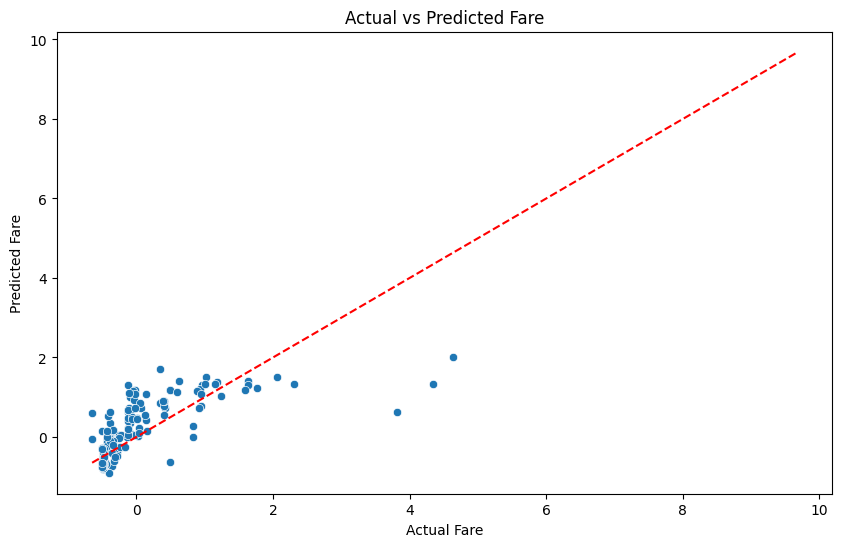

In [182]:
# Let's Training and Testing the Dataset
# Define the features and target variable
X = df[["survived","sex", "age","pclass", "parch", "sibsp", "embarked", "who"]]
y = df["fare"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a scaler only on 'age' column
age_scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled['age'] = age_scaler.fit_transform(X_train[['age']])
X_test_scaled['age'] = age_scaler.transform(X_test[['age']])

# Initialize the Linear Regression model
model = LinearRegression()
# Fit the model on the training data
model.fit(X_train_scaled, y_train)
# Predict the target variable on the test set
y_pred = model.predict(X_test_scaled)
# Display the first few predictions
print("\nFirst few predictions:")
print(y_pred[:5])
# Let's Evaluate the Model
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
# Display the evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
# Let's check the results of the model
print("\nFirst few actual vs predicted values:")
print(pd.DataFrame({"Actual": y_test, "Predicted": y_pred}).head())

# Let's check the prediction of fare for 50 years old female passenger with 0 parch, 0 sibsp, and embarked at 'S'
test_passenger = pd.DataFrame({"survived": [1], "sex": [1], "age": [50],"pclass":[1], "parch": [0], "sibsp": [0], "embarked": [1],"who": [2]})
test_passenger['age'] = age_scaler.transform(test_passenger[['age']])  # Only scale 'age'

# Predict the fare
predicted_fare = model.predict(test_passenger)
print(f"\nPredicted fare for a 50 years old female passenger: {predicted_fare}")

# Let's Visualize the Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()